# Proyecto final
Edgar Sabán - 19012631

## Introducción

El proyecto consiste en crear modelos predictivos de regresión lineal uni-variable de la forma **y = f(x) =  mx +b**

Donde:

**y** = la variable dependiente<br>
**x** = variable independiente<br>
**m** = pendiente de la recta(parámetro del modelo)<br>
**b** = intercepto(parámetro del modelo)<br>

## Sobre el conjunto de datos

El conjunto de datos representa el precio de venta real de casas en función de características que estas las definen.

* SalePrice
* OverallQual
* 1stFlrSF
* TotRmsAbvGrd
* YearBuilt
* LotFrontage

Este conjuto de datos está conformado por 6 variables y 1460 observaciones; A nivel de estructura de datos **Array** en Python, el conjunto de datos está estructurado de la siguiente forma:

<img src="images/dataset.png"/>

La variable **SalePrice** es considerada la variable *dependiente*, mientras que el resto de variables son las *independientes*.
## Análisis exploratorio

### Carga de datos

Se carga el conjunto de datos provisto con apoyo de NumPy

In [1]:
# Importando paquetes y librerías
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# Carga de datos y conversión a un DataFrame
data = np.load('data/proyecto_training_data.npy')
data = pd.DataFrame(data)
data.columns = ["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFlrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


Se observa que en la variable **LotFrontage** existen valor NaN, por lo cual se procede a reemplazar estos por el promedio de dicha variable.

In [3]:
promedio = np.mean(data[["LotFrontage"]])
data = data.replace(np.nan,0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFlrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1460 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


### Split dataset

De la totalidad de los datos, esto se separan en dos conjunto, uno denominado **Train** que servirá para realizar el modelo de predicción lineal y el otro **Test** para realizar la validación y pruebas, cada uno de estos estará integrado por el 80% y 20% de los datos respectivamente.

Del total de los 1,460 datos el 80% son 1,168 y el 20% 292, con base a esto se procede a tomar los primero 1,168 datos para Train y los restantes para Test.

In [4]:
Train = data[0:1168]
Test = data[1168:]

In [5]:
# Estructura del Train
print(Train.shape)
Train.head()

(1168, 6)


,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [6]:
# Estructura del Test
print(Test.shape)
Test.head()

(292, 6)


,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
1168,235000.0,6.0,1236.0,7.0,1935.0,120.0
1169,625000.0,10.0,1831.0,10.0,1995.0,118.0
1170,171000.0,6.0,1118.0,6.0,1977.0,76.0
1171,163000.0,6.0,1261.0,6.0,1958.0,76.0
1172,171900.0,7.0,625.0,5.0,2006.0,35.0


### Explorando datos

A continuación, se presentan datos estadísticos sobre cada una de las variables, usando el conjunto de datos **Train**.

In [7]:
# Función que devuelve las estadísticas descriptivas más generales
def getStats(var):
    stats = "-------------------------------------------------------------------------------------------------------------------\n"
    stats += "Media:" + str(round(np.mean(var),2))
    stats += " | Valor máximo:" + str(round(np.max(var),2))
    stats += " | Valor mínimo:" + str(round(np.min(var),2))
    stats += " | Rango:" + str(round(np.ptp(var),2))
    stats += " | Desviación estándar:" + str(round(np.std(var),2)) + "\n"
    stats += "-------------------------------------------------------------------------------------------------------------------\n"
    print(stats)

In [8]:
# Cálculo de las estadísticas generales para cada variable
for i in range(6):
    getStats(Train.iloc[:,i])

-------------------------------------------------------------------------------------------------------------------
Media:180590.28 | Valor máximo:755000.0 | Valor mínimo:34900.0 | Rango:720100.0 | Desviación estándar:78781.95
-------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------
Media:6.1 | Valor máximo:10.0 | Valor mínimo:1.0 | Rango:9.0 | Desviación estándar:1.38
-------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------
Media:1156.32 | Valor máximo:3228.0 | Valor mínimo:334.0 | Rango:2894.0 | Desviación estándar:373.62
-------------------------------------------------------------------------------------------------------------------

-

#### Gráficas de distribución
Se presentan las gráficas de distribución de cada una de las variables del conjuntos de datos

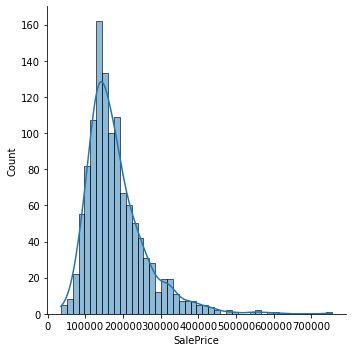

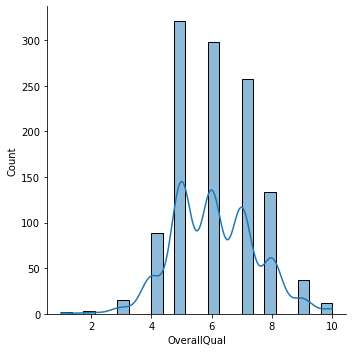

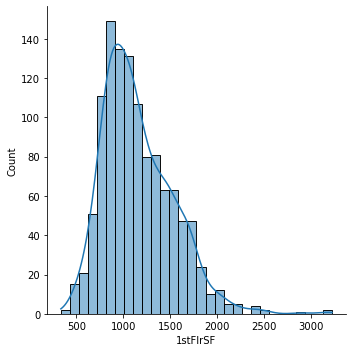

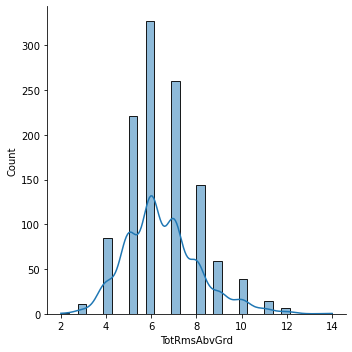

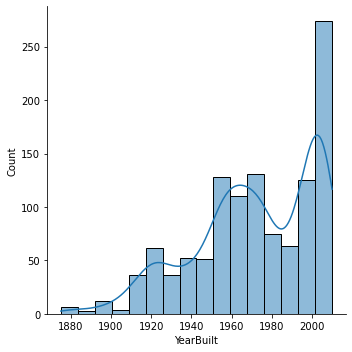

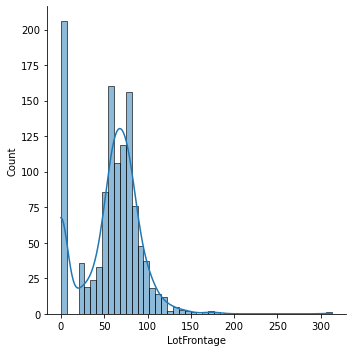

In [9]:
for i in range(6):
    ax = sns.displot(Train.iloc[:,i], kde = True)
    ax.set(xlabel=Train.columns.values[i])

#### Coeficientes de correlación
Calculando los coeficientes de correlación para determinar qué variables presentar una mayor relación y con base a esto eligir aquellas que tiene una relación más fuerte para poder calcular los modelos predictivos lineales.

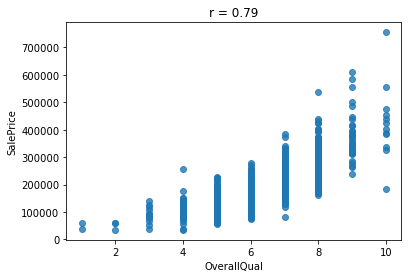

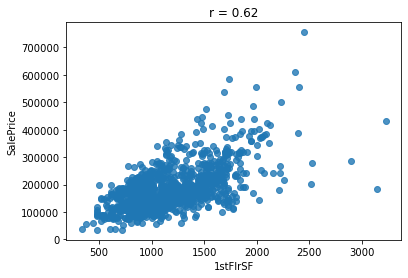

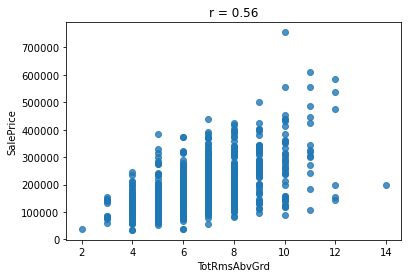

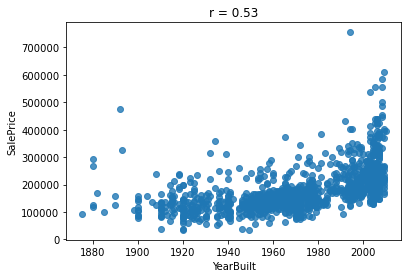

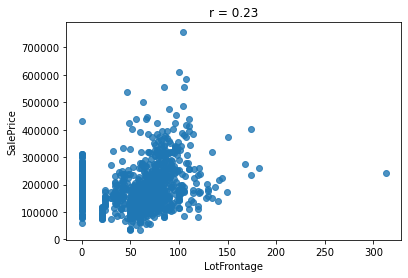

In [10]:
for i in range(5):
    corr = Train.iloc[:,0].corr(Train.iloc[:,i+1])
    fig, ax = plt.subplots(1, 1)
    ax.scatter(x=Train.iloc[:,i+1], y=Train.iloc[:,0], alpha= 0.8)
    ax.set_xlabel(Train.columns.values[i+1])
    ax.set_ylabel(Train.columns.values[0])
    ax.set_title("r = "+ str(round(corr,2)))

---
**Selección de variables**

Se puede observar que existen correlaciones bajas, medias y altas, entre el **SalesPrice** (variable dependiente) y las demás variables (independientes).

Con base a los cálculos realizados de los coeficientes de correlación y la visualización de los datos por medio de los scatterplots, se seleccionan dos variables con más potencial predictivo (las dos que presentan mayor correlación), estas son: **OverallQual y 1stFlrSF**

---

### Modelos de entrenamiento

Estos modelos son calculados de manera manual, lo que significa que se escribió un algoritmo para calcular los parámetros **m** y **b** a través de una serie de iteraciones y cálculos matemáticos, haciendo uso del método de gradientes.

In [11]:
# Función para entrenamiento de modelo de regresión lineal
def regresionLineal(observaciones, valores, epochs, errorp, lr):
    # Preparación de arreglos
    x0 = np.array([observaciones, np.ones_like(observaciones)])
    x = np.transpose(x0)
    y = np.array(valores)
    parametros = np.array([0, 0])
    
    # Arreglos a devolver
    errores = []
    parametrosDict = {}

    # epochs
    for i in range(epochs):
        yhat = np.dot(x,parametros)
        error = np.mean((y-yhat)**2)/2
        gradiente = ((yhat - y) * x0).mean(axis = 1)
        parametros = parametros - lr * gradiente
        # Valores a devolver
        parametrosDict[i+1] = parametros
        errores.append(error)
        # Validando la impresión
        if i%errorp == 0:
            print("Iteración (Epoch):",i,"Error:", error)
            
    return errores, parametrosDict

La siguiente función tiene por objetivo visualizar el comportamiento del error que genera el modelo en cada iteración (epoch), para que puede apoyar a identificar los mejor parámetros de **m**y **b**.

In [12]:
# Función para visualizar los errores en el tiempo del modelo de regresión lineal
def losses(errores):
    plt.plot(range(1,len(errores)+1),errores)
    plt.title("Tendencia del error")
    plt.xlabel("Iteración")
    plt.ylabel("Error")
    plt.show()

Se calculan los modelos de entrenamiento para las variables **OverallQual** y **SalePrice**, cada uno de estos modelos ha sido entrenado varias veces para ver su comportamiento, por lo que después de varios entrenamientos, se han definido para cada modelo las iteraciones (epochs) y el Learn rate adecuado.

**Modelo de regresión lineal para SalePrice ~ OverallQual**

Iteración (Epoch): 0 Error: 19409722053.22175


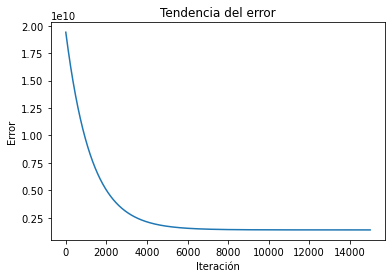

In [13]:
# modelo
errores, parametrosDict = regresionLineal(Train["OverallQual"], Train["SalePrice"], 15000, 15000, 0.00001)
losses(errores)

---
Se observa que el modelo de entrenamiento requiere aproximadamente 2,000 iteraciones (epochs) o más para que el error empieza a disminuir y se vuelva de cierta forma constante.

---

**Modelo de regresión lineal para SalePrice ~ 1stFlrSF**

Iteración (Epoch): 0 Error: 19409722053.22175


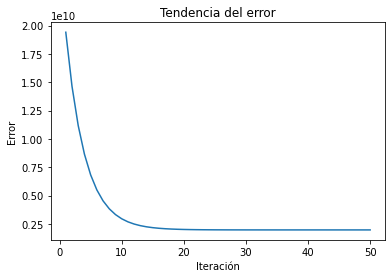

In [14]:
errores, parametrosDict = regresionLineal(Train["1stFlrSF"], Train["SalePrice"], 50, 50, 0.0000001)
losses(errores)

---
Se observa que el modelo de entrenamiento requiere pocas iteraciones (epochs) aproximadamente 5 para que el error empieza a disminuir y se vuelva constante.

---

#### Evolución de los modelos

A continuación se muestra el comportamiento de la línea de regresión de los modelos de entrenamiendo a medida que van incrementando las iteraciones (epochs).


In [15]:
def evolucionRegresion(x,y,modelos,n):
    for i in range(0, len(modelos),n):
        fig, ax = plt.subplots(1, 1)
        ax.scatter(x=x, y=y, alpha = 0.3)
        yhat = parametrosDict[i+1][0]*x+parametrosDict[i+1][1]
        ax.plot(x,yhat,"r", alpha = 0.7)

**Modelo para SalePrice ~ OverallQual**

Iteración (Epoch): 0 Error: 19409722053.22175
Iteración (Epoch): 3000 Error: 3020465576.140955
Iteración (Epoch): 6000 Error: 1540196221.6903095
Iteración (Epoch): 9000 Error: 1405920805.263565
Iteración (Epoch): 12000 Error: 1393164317.2045057


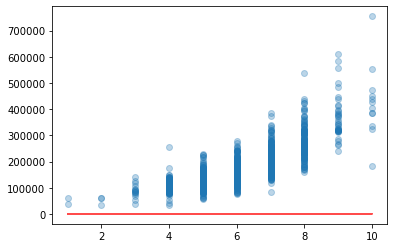

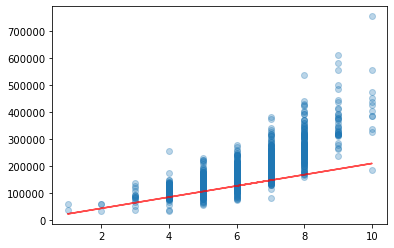

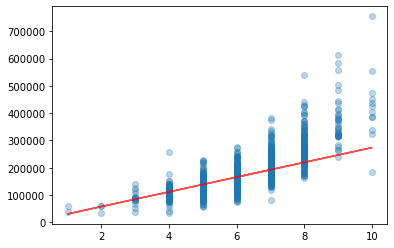

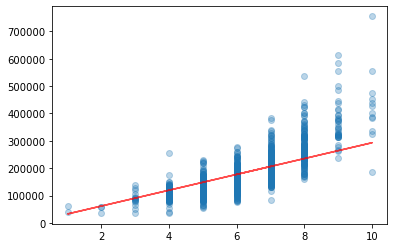

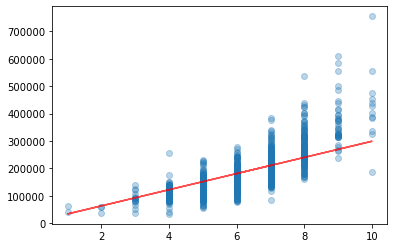

In [16]:
x = Train["OverallQual"]
y = Train["SalePrice"]
n = 3000

errores, parametrosDict = regresionLineal(x, y, 15000, n, 0.00001)
evolucionRegresion(x, y,parametrosDict, n)

Por medio de esta serie de gráficas se puede observar la manera de cómo el modelo representa de mejor manera el conjunto de datos a medida que la cantidad de iteración va aumentando, lo cual confirma lo que se podía estimar con la gráfica de la tendencia del error.

**Modelo para SalePrice ~ 1stFlrSF**

Iteración (Epoch): 0 Error: 19409722053.22175
Iteración (Epoch): 10 Error: 2682203837.751268
Iteración (Epoch): 20 Error: 1997330831.0274525
Iteración (Epoch): 30 Error: 1969290140.4881186
Iteración (Epoch): 40 Error: 1968142065.5972984


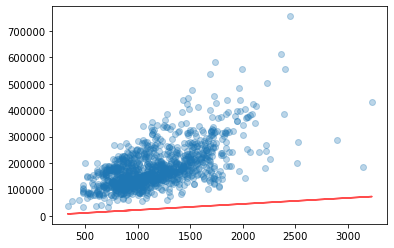

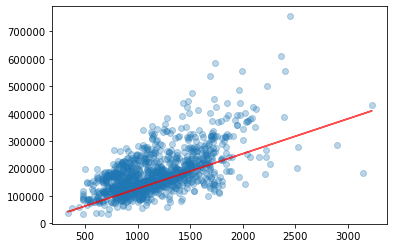

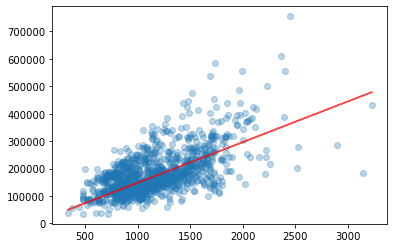

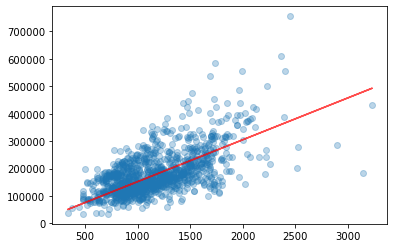

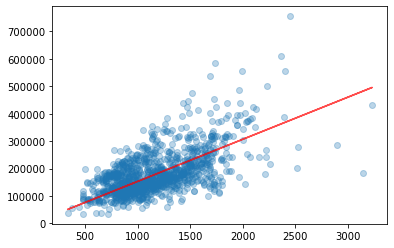

In [17]:
x = Train["1stFlrSF"]
y = Train["SalePrice"]
n = 10

errores, parametrosDict = regresionLineal(x, y, 50, n, 0.0000001)
evolucionRegresion(x, y,parametrosDict, n)

De igual forma los modelos de regresión lineal calculados para la variables **1stFlrSF** representa de mejor manera al conjunto de datos conforme las iteraciones (epochs) van incrementando.

## Comparación entre modelos

Para realizar la comparación se utilizarán dos tipos de modelos: los manuales y los sklearn. Los manuales son aquellos que fueron calculados previamente con base al método de gradiente y los sklearn son los modelos que se calcularon haciendo uso de la librería *sklearn.linear_model*

Las siguientes funciones realizan los cálculos de las predicciones para los modelo manuales y los sklearn, así como el cálculo de los errores de predicción de cada una de estas.

---
Es importante tomar en cuenta que para hacer estas comparaciones entre modelos se usaron el 20% de los datos (los datos del Test) y las variables **SalePrice**, **1stFlrSF**, **OverallQual**.

---

In [18]:
def predicciones(skModel, manualModel, x, var):
    
    #Predicciones con modelo skModel
    pred_skmodel = skModel.predict(pd.DataFrame(x))
    pred_skmodel = pred_skmodel.transpose()
    pred_skmodel = pred_skmodel[0]
    
    
    #Predicciones con modelo Manual
    x = np.array([x, np.ones_like(x)])
    x = np.transpose(x)
    if var==1:
        yhat = np.dot(x,manualModel[6000]) # Modelo OverallQual del Epoch 6000
    else:
        yhat = np.dot(x,manualModel[30]) # Modelo 1stFlrSF del Epoch 30
    
    promedio = (pred_skmodel+yhat)/2
    return pred_skmodel, yhat, promedio
    
def erroresPrediccion(y, yhat):
    error = np.mean((y-yhat)**2)/2
    return error

Cálculo de los modelos de regresión lineal **Sklearn** y **Manuales**

In [19]:
# Regresiones lineales con sklearn
lm = LinearRegression()
lmOverallQual = lm.fit(pd.DataFrame(Train['OverallQual']),pd.DataFrame(Train['SalePrice']))
lm1stFlrSF = lm.fit(pd.DataFrame(Train['1stFlrSF']),pd.DataFrame(Train['SalePrice']))

# Regresiones lineales manuales
erroresOverallQual, parametrosDictOverallQual = regresionLineal(Train["OverallQual"], Train["SalePrice"], 15000, 15000, 0.00001)
errores1stFlrSF, parametrosDict1stFlrSF = regresionLineal(Train["1stFlrSF"], Train["SalePrice"], 50, 50, 0.0000001)

Iteración (Epoch): 0 Error: 19409722053.22175
Iteración (Epoch): 0 Error: 19409722053.22175


Cálculo de las predicciones para los modelos de regresión lineal **Sklearn** y **Manuales**

In [20]:
# Predicciones con los modelos sklean y manuales   
pred_skmodel_OverallQual, yhat_OverallQual, promedio_OverallQual = predicciones(lmOverallQual, parametrosDictOverallQual, Test['OverallQual'],1)
pred_skmodel_1stFlrSF, yhat_1stFlrSF, promedio_1stFlrSF = predicciones(lm1stFlrSF, parametrosDict1stFlrSF, Test['1stFlrSF'],2)

Cálculo de los errores de predicción de los modelos de regresión lineal **Sklearn** y **Manuales**

In [21]:
# Errores de predicción

# Variable OverallQual
error_skmodel_OverallQual = erroresPrediccion(Test["SalePrice"], pred_skmodel_OverallQual)
error_manual_OverallQual = erroresPrediccion(Test["SalePrice"], yhat_OverallQual)

# Variable 1stFlrSF
error_skmodel_1stFlrSF = erroresPrediccion(Test["SalePrice"], pred_skmodel_1stFlrSF)
error_manual_1stFlrSF = erroresPrediccion(Test["SalePrice"], yhat_1stFlrSF)

**Evaluación de los modelos**

La evaluación de los modelos manuales y sklearn para las variables *OverallQual* y *1stFlrSF*, se realiza por medio de la comparación de los errores de predicción que cada uno de estos genera. Se realiza una gráfica de barras para comparar los errores de predicción, como se muestra a continuación.

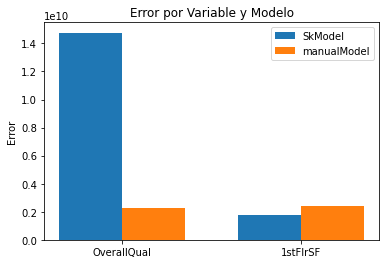

In [22]:
#Validación de los modelos
labels = ['OverallQual','1stFlrSF']
OverallQual = [error_skmodel_OverallQual, error_manual_OverallQual]
_1stFlrSF = [error_skmodel_1stFlrSF, error_manual_1stFlrSF]

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, OverallQual, width, label='SkModel')
rects2 = ax.bar(x + width/2, _1stFlrSF, width, label='manualModel')

ax.set_ylabel('Error')
ax.set_title('Error por Variable y Modelo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

---
Se puede observar que el modelo de predicción **manual** para la variable **OverallQual** presenta menos error de predicción respecto al modelo calculado con sklearn, así mismo el modelo calculado con **sklearn** para la variable **1stFlrSF** tiene un error más bajo que el modelo calculado manualmente.

---

## Conclusiones

1.Con base al coeficiente de correlación, se logró determinar que las variables **OverallQual** y **1stFlrSF** debían ser tomadas en consideración para generar los modelos de regresión lineal para la predicción de **SalePrice**, ya que estas presentaron un coeficiente de correlación alto **r=0.79** y **r=0.62** respectivamente.
2.Sobre los modelos seleccionados:
* Para la variable **OverallQual**, se pudo determinar que uno de los modelos que presentaba el error más bajo es aquel que fue calculado aproximadamente en la **iteración (epoch) = 15,000**, con un **lr = 0.00001**. Este modelo fue usado para realizar las predicción y comparaciones.
* Para la variable **1stFlrSF**, se pudo determinar que uno de los modelos que presentaba el error más bajo es aquel que fue calculado aproximadamente en la **iteración (epoch) = 50**, con un **lr = 0.0000001**. Este modelo fue usado para realizar las predicción y comparaciones.
3.Sobre la evaluación de los modelos:
* Se calcularon 2 tipos de modelosde regresión lineal: los manuales (calculados por medio de gradientes) y los sklearn (calculados por medio de la librería sklearn.linear_model).
* Para cada variable **OverallQual** y **1stFlrSF** se calcularon los 2 tipos de modelos.
* Los modelos se evaluaron con los datos del Test (20% de los datos)
* Para cada modelo de regresión lineal se calculó el errror de predicción obteniendo los siguientes resultados: El modelo manual calculado para **OverallQual** presenta un error bajo de predicción y el modelo calculado con la librería sklearn.linear_model para **1stFlrSF** también presenta un error de predicción bajo
4.Con base a la evaluación de los errrores se concluye que le mejor modelo para la predicción de **SalePrice** es el calculado a partir de la variable **1stFlrSF** por medio de la librería *sklearn.linear_model*, con los siguientes parámetros.

In [23]:
b = lm1stFlrSF.intercept_
m = lm1stFlrSF.coef_

print("b=",b,"m=",m)

b= [30324.58517496] m= [[129.95124229]]
